<a href="https://colab.research.google.com/github/andreaeddyricci/Webinar-Attendance-Capstone/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries and the Data

In [1]:
#Imported libraries:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
path = '/content/gdrive/MyDrive/Springboard/3D_Heals_Project/Riipen_Springboard/combined_webinars_no_duplicates.csv'
df = pd.read_csv(path, index_col='Unnamed: 0')

In [5]:
df.drop(labels=['Email','Organization'], axis=1).head()

,Attended,City,Country/Region,State/Province,Industry,Job Title,Questions & Comments,Registration Time,Join Time,Leave Time,Time in Session (minutes),Country/Region Name,Source Name,webinar_name,Job Title Category,Total_time,Number_of_Logins,Registered_Webinars,Attended_Webinars,Attended_Percent
0,0,Pune,IN,Other,Software - Other,developer,0,2022-08-29 12:32:37,NaN,NaN,0,India,mailchimp,3D Metal,Other,0.0,0.0,3,1,0.333333
1,0,Pune,IN,Other,Other,develer,0,2022-09-06 12:48:32,NaN,NaN,0,India,mailchimp,Biomaterials,Other,0.0,0.0,3,1,0.333333
2,1,bazpur,IN,Other,Education,not given,0,2022-08-22 23:43:21,2022-09-01 08:00:52,2022-09-01 10:09:13,141,India,mailchimp,Indian Ecosystem,None,141.0,5.0,3,1,0.333333
3,0,Kayseri,TR,Other,High Tech - Other,phd student,0,2022-09-06 22:29:58,NaN,NaN,0,Turkey,linkedin,Biomaterials,Academic,0.0,0.0,1,0,0.000000
4,0,Nairobi,KE,Other,High Tech - Other,founder,0,2022-09-29 01:19:43,NaN,NaN,0,Kenya,website,Preprocessing,C-Suite,0.0,0.0,1,0,0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 689 entries, 0 to 696
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email                      689 non-null    object 
 1   Attended                   689 non-null    int64  
 2   City                       689 non-null    object 
 3   Country/Region             689 non-null    object 
 4   State/Province             689 non-null    object 
 5   Industry                   689 non-null    object 
 6   Organization               689 non-null    object 
 7   Job Title                  689 non-null    object 
 8   Questions & Comments       689 non-null    int64  
 9   Registration Time          689 non-null    object 
 10  Join Time                  309 non-null    object 
 11  Leave Time                 309 non-null    object 
 12  Time in Session (minutes)  689 non-null    int64  
 13  Country/Region Name        689 non-null    object 

In [ ]:
df.columns

Index(['Email', 'Attended', 'City', 'Country/Region', 'State/Province',
       'Industry', 'Organization', 'Job Title', 'Questions & Comments',
       'Registration Time', 'Join Time', 'Leave Time',
       'Time in Session (minutes)', 'Country/Region Name', 'Source Name',
       'webinar_name', 'Job Title Category', 'Total_time', 'Number_of_Logins',
       'Registered_Webinars', 'Attended_Webinars', 'Attended_Percent'],
      dtype='object')

In [ ]:
# Convert time to datetime type
df['Join Time'] = pd.to_datetime(df['Join Time'], errors='coerce') 
df['Leave Time'] = pd.to_datetime(df['Leave Time'], errors='coerce')
df['Registration Time'] = pd.to_datetime(df['Registration Time'], errors='coerce')

In [ ]:
# Convert other columns to category type
columns = ['Email', 'Attended', 'City', 'Country/Region', 'State/Province',
       'Industry', 'Organization', 'Job Title', 'Questions & Comments',
       'Country/Region Name', 'Source Name', 'webinar_name', 'Job Title Category']
for i in columns:
    df[i] = df[i].astype('category')

In [ ]:
df.dtypes

Email                              category
Attended                           category
City                               category
Country/Region                     category
State/Province                     category
Industry                           category
Organization                       category
Job Title                          category
Questions & Comments               category
Registration Time            datetime64[ns]
Join Time                    datetime64[ns]
Leave Time                   datetime64[ns]
Time in Session (minutes)             int64
Country/Region Name                category
Source Name                        category
webinar_name                       category
Job Title Category                 category
Total_time                          float64
Number_of_Logins                    float64
Registered_Webinars                   int64
Attended_Webinars                     int64
Attended_Percent                    float64
dtype: object

In [ ]:
df.isna().sum()

Email                          0
Attended                       0
City                           0
Country/Region                 0
State/Province                 0
Industry                       0
Organization                   0
Job Title                      0
Questions & Comments           0
Registration Time              0
Join Time                    380
Leave Time                   380
Time in Session (minutes)      0
Country/Region Name            0
Source Name                    0
webinar_name                   0
Job Title Category             0
Total_time                     0
Number_of_Logins               0
Registered_Webinars            0
Attended_Webinars              0
Attended_Percent               0
dtype: int64

#Overview of the Data

In [ ]:
df.describe()

,Time in Session (minutes),Total_time,Number_of_Logins,Registered_Webinars,Attended_Webinars,Attended_Percent
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,29.259797,29.259797,0.653120,1.467344,0.648766,0.448476
std,40.041521,40.041521,1.477592,0.806510,0.785961,0.466027
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.250000
75%,63.000000,63.000000,1.000000,2.000000,1.000000,1.000000
max,163.000000,163.000000,29.000000,4.000000,4.000000,1.000000


Attended
0           0.551524
1           0.448476
dtype: float64


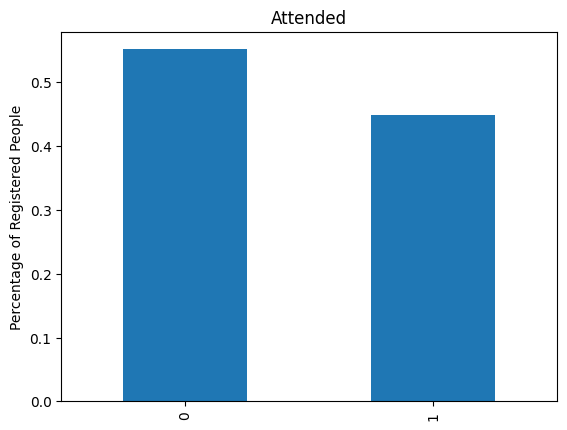

Country/Region
US                0.306241
IN                0.165457
TR                0.060958
DE                0.042090
ES                0.037736
GB                0.033382
SG                0.029028
BR                0.029028
CA                0.026125
SA                0.015965
HU                0.015965
AU                0.014514
KE                0.013062
IL                0.013062
FR                0.013062
IT                0.011611
NL                0.011611
AR                0.011611
EC                0.010160
KR                0.008708
HK                0.008708
PL                0.007257
AE                0.007257
PE                0.007257
GR                0.007257
MA                0.005806
ET                0.005806
SE                0.005806
NZ                0.004354
Other             0.004354
NG                0.004354
PK                0.004354
PT                0.004354
CH                0.004354
VN                0.004354
UA                0.002903
ID           

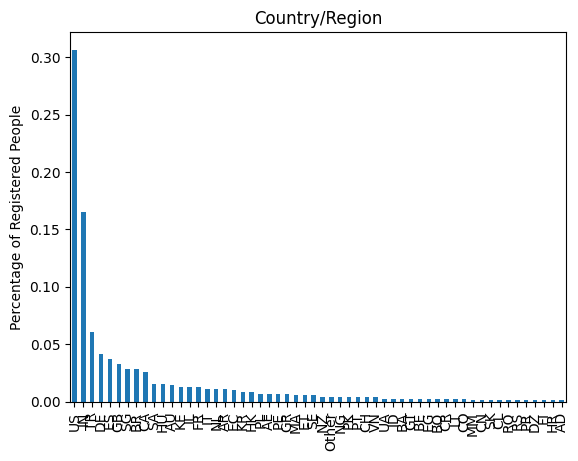

Industry                         
Medical,  Pharma,  Biotech           0.343977
Education                            0.195936
Manufacturing                        0.132075
Hospital,  Clinic,  Doctor Office    0.082729
Other                                0.076923
High Tech - Hardware                 0.033382
Consulting                           0.029028
Software - Healthcare                0.021771
Energy,  Chemical,  Utilities        0.014514
High Tech - Other                    0.014514
Government - Federal                 0.011611
Aerospace & Defense                  0.007257
Advertising/Marketing/PR             0.005806
Software - Other                     0.004354
Consumer Products                    0.004354
Financial Services - Other           0.004354
Accounting                           0.002903
Legal                                0.002903
High Tech - ISP                      0.002903
Government - State & Local           0.002903
Call Center Outsourcing              0.002903


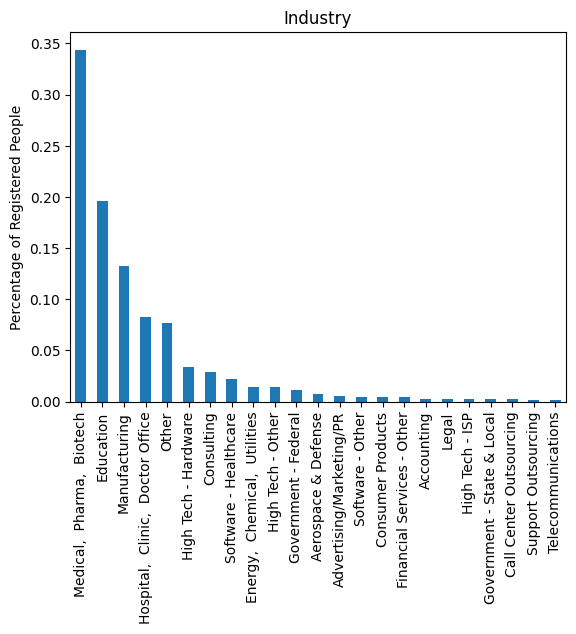

Questions & Comments
0                       0.988389
1                       0.011611
dtype: float64


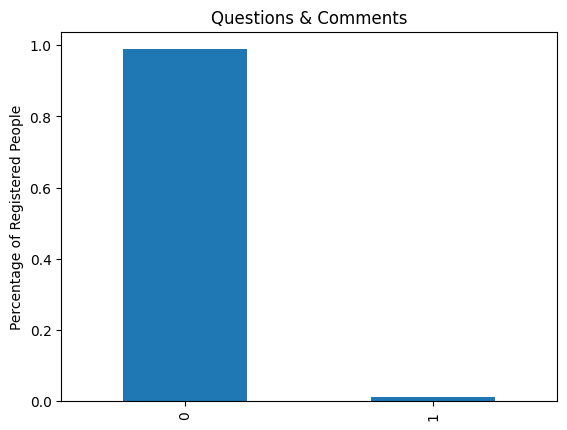

Source Name
mailchimp      0.595065
linkedin       0.240929
website        0.158200
instagram      0.005806
dtype: float64


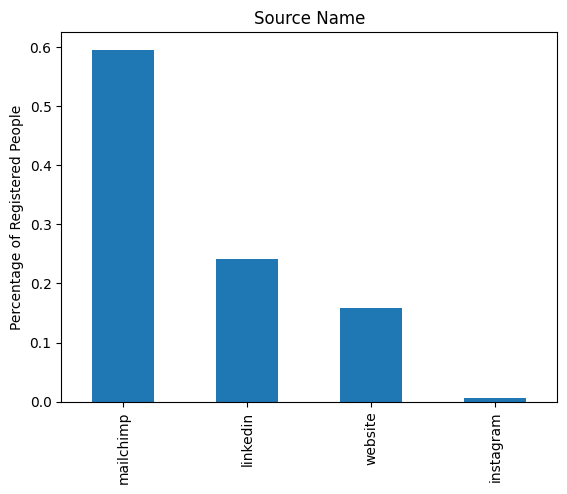

webinar_name    
Biomaterials        0.312046
3D Metal            0.301887
Preprocessing       0.236575
Indian Ecosystem    0.149492
dtype: float64


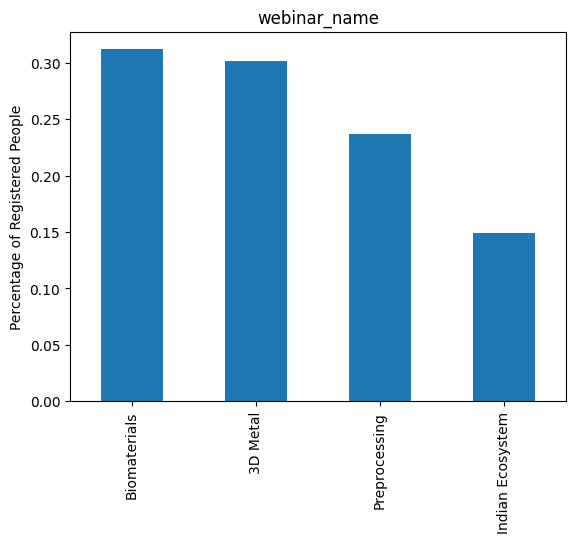

Job Title Category   
None                     0.329463
Academic                 0.134978
C-Suite                  0.098694
Researcher               0.089985
Other                    0.088534
Manager, Director        0.082729
Engineer                 0.071118
Clinician                0.031930
Marketer, Salesperson    0.023222
Designer                 0.017417
Business Developer       0.015965
Consultant               0.013062
Operator                 0.002903
dtype: float64


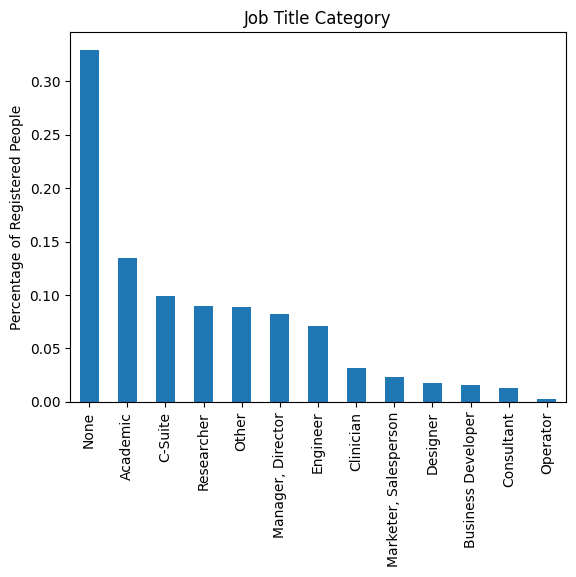

In [ ]:
cat_columns = ['Attended', 'Country/Region', 'Industry', 'Questions & Comments',
       'Source Name', 'webinar_name', 'Job Title Category']

for col in cat_columns:
    #print("The percentage of people with " + str(col))
    print(df[[col]].value_counts(normalize=True))
    plt.title(col)
    plt.ylabel("Percentage of Registered People")
    df[col].value_counts(normalize=True).plot(kind='bar')
    plt.show()

# Visualizing the Data of who Attended

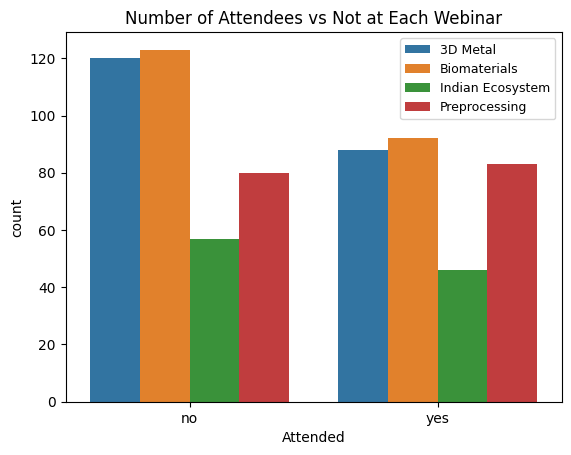

In [ ]:
_ = sns.countplot(data = df, x = 'Attended', hue='webinar_name')
_ = plt.legend(loc='upper right', fontsize=9)
_ = plt.title("Number of Attendees vs Not at Each Webinar")
_ = plt.xticks([0,1],['no','yes'])

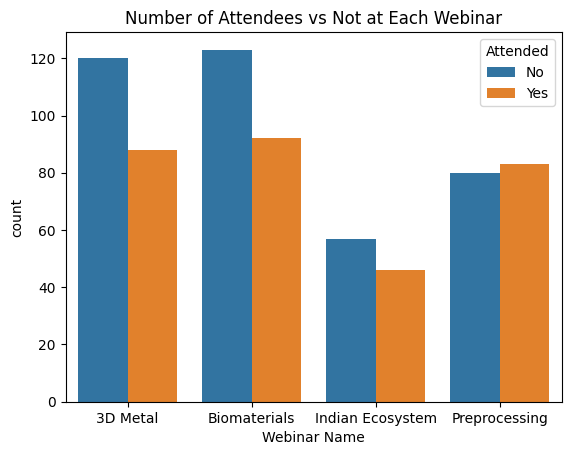

In [ ]:
_ = sns.countplot(data = df, hue = 'Attended', x='webinar_name')
_ = plt.title("Number of Attendees vs Not at Each Webinar")
_ = plt.legend(title = 'Attended', labels = ['No','Yes'], fontsize=10)
_ = plt.xticks(fontsize=10)
_ = plt.xlabel('Webinar Name')

In [ ]:
df.groupby('webinar_name')['Attended'].value_counts(normalize=True)

webinar_name       
3D Metal          0    0.576923
                  1    0.423077
Biomaterials      0    0.572093
                  1    0.427907
Indian Ecosystem  0    0.553398
                  1    0.446602
Preprocessing     1    0.509202
                  0    0.490798
Name: Attended, dtype: float64

In [ ]:
# Create a dataframe for only those who attended
df_attended = df[df["Attended"] == 1]

In [ ]:
df.columns

Index(['Email', 'Attended', 'City', 'Country/Region', 'State/Province',
       'Industry', 'Organization', 'Job Title', 'Questions & Comments',
       'Registration Time', 'Join Time', 'Leave Time',
       'Time in Session (minutes)', 'Country/Region Name', 'Source Name',
       'webinar_name', 'Job Title Category', 'Total_time', 'Number_of_Logins',
       'Registered_Webinars', 'Attended_Webinars', 'Attended_Percent'],
      dtype='object')

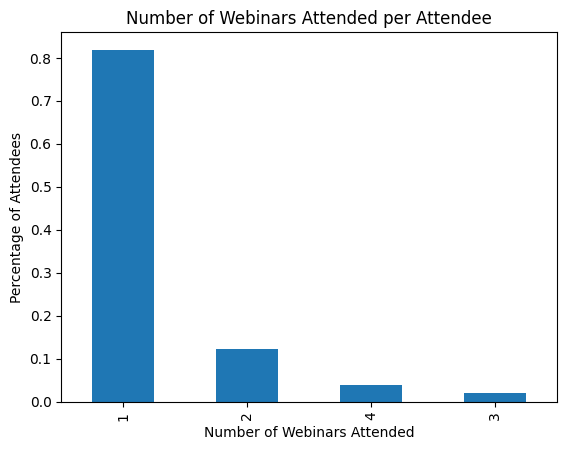

In [ ]:
df_attended['Attended_Webinars'].value_counts(normalize=True).plot(kind='bar')
_ = plt.title('Number of Webinars Attended per Attendee')
_ = plt.ylabel("Percentage of Attendees")
_ = plt.xlabel("Number of Webinars Attended")

In [ ]:
# what percentage of attendees attended 1, 2, 3, or 4 of the webinars?
df_attended['Attended_Webinars'].value_counts(normalize=True)

1    0.818770
2    0.122977
4    0.038835
3    0.019417
Name: Attended_Webinars, dtype: float64

In [ ]:
# what are the job titles in each webinar?
groups1 = df_attended.groupby('webinar_name')['Job Title Category'].value_counts(normalize=True)
groups1

webinar_name                           
3D Metal          None                     0.443182
                  Academic                 0.125000
                  C-Suite                  0.102273
                  Other                    0.079545
                  Researcher               0.079545
                  Engineer                 0.056818
                  Clinician                0.034091
                  Manager, Director        0.034091
                  Designer                 0.022727
                  Business Developer       0.011364
                  Marketer, Salesperson    0.011364
                  Consultant               0.000000
                  Operator                 0.000000
Biomaterials      None                     0.380435
                  Researcher               0.163043
                  Academic                 0.152174
                  C-Suite                  0.097826
                  Manager, Director        0.065217
                  Other 

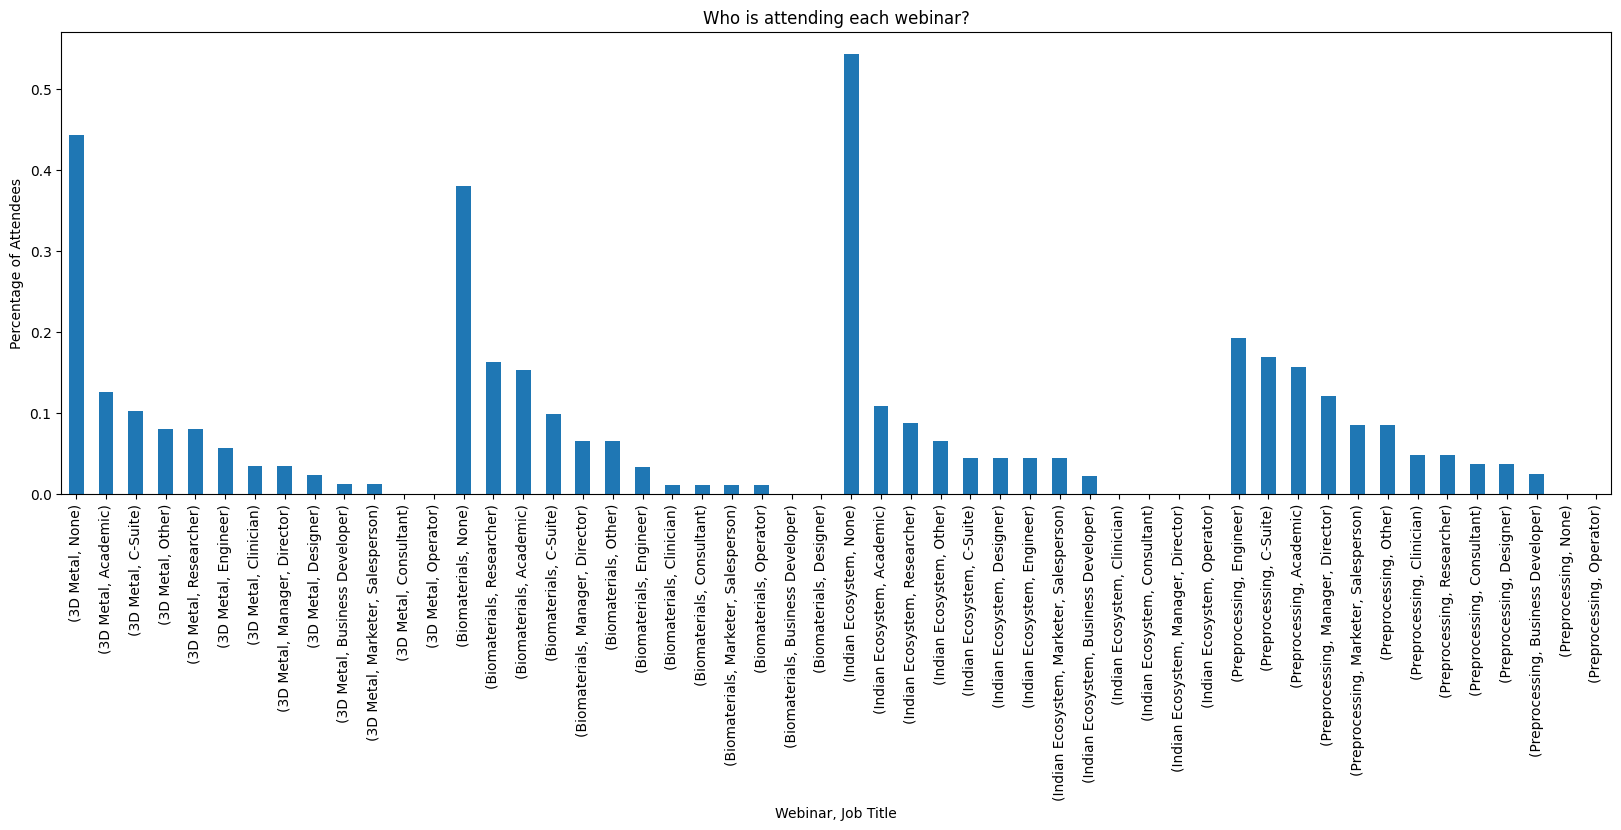

In [ ]:
_ = groups1.plot(kind='bar',
             figsize=(20, 6),
             xlabel='Webinar, Job Title', 
             ylabel = 'Percentage of Attendees',
             title = 'Who is attending each webinar?',
             )

In [ ]:
# what webinars are each job title attending?
groups2 = df_attended.groupby('Job Title Category')['webinar_name'].value_counts(normalize=True)

<Axes: xlabel='Job Title Category,None'>

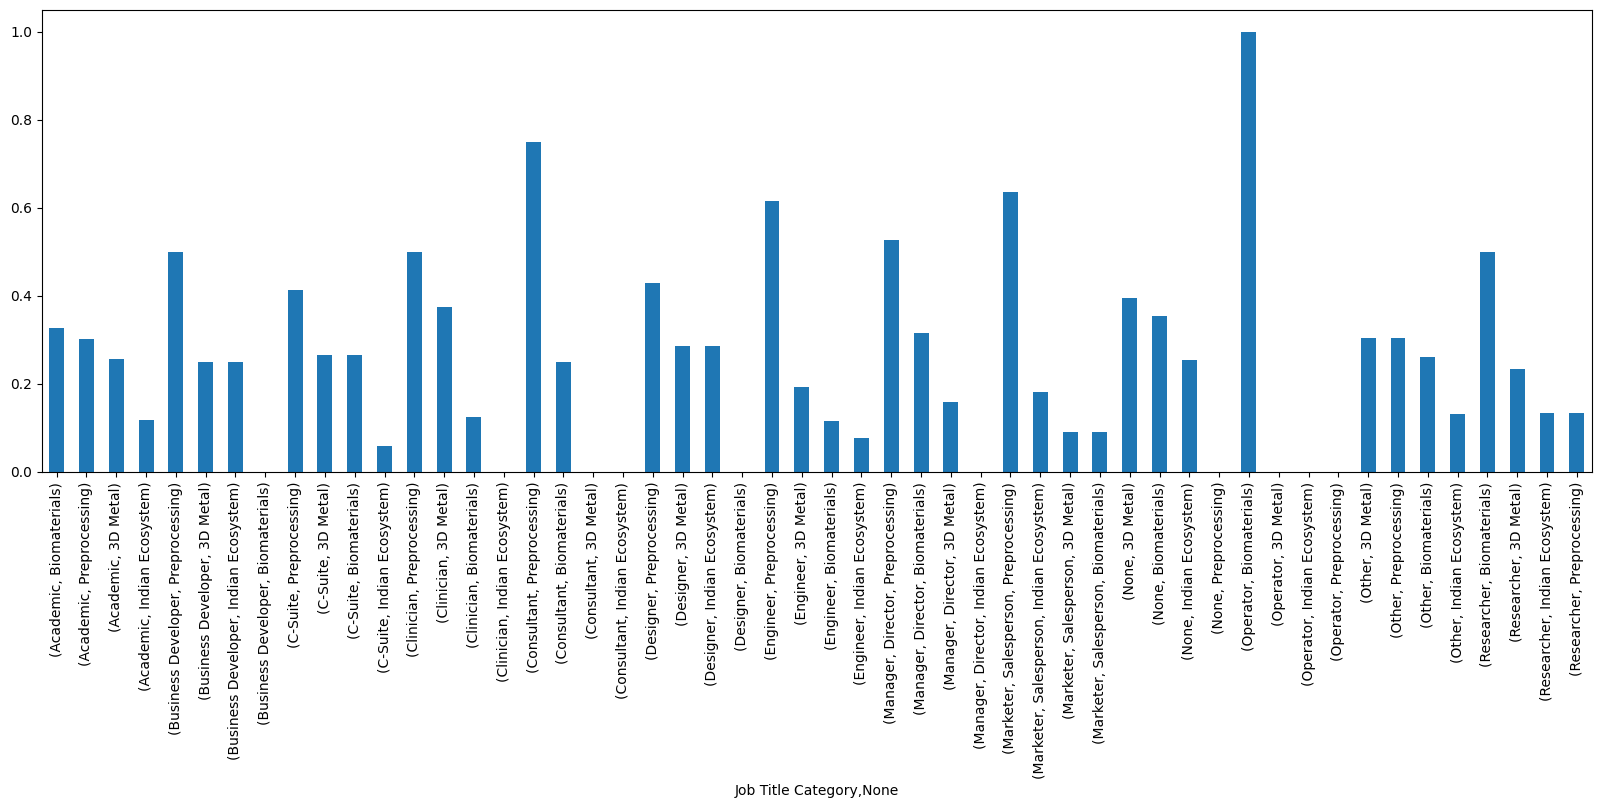

In [ ]:
groups2.plot(kind='bar',figsize=(20, 6))

In [ ]:
df_attended.nunique()

Email                        277
Attended                       1
City                         226
Country/Region                44
State/Province                40
Industry                      19
Organization                 252
Job Title                    145
Questions & Comments           2
Registration Time            308
Join Time                    289
Leave Time                   200
Time in Session (minutes)    109
Country/Region Name           44
Source Name                    4
webinar_name                   4
Job Title Category            13
Total_time                   109
Number_of_Logins              11
Registered_Webinars            4
Attended_Webinars              4
Attended_Percent               6
dtype: int64

In [ ]:
# How did you hear about this webinar?
sources = df_attended['Source Name'].value_counts(normalize=True)
sources

mailchimp    0.511327
linkedin     0.320388
website      0.165049
instagram    0.003236
Name: Source Name, dtype: float64

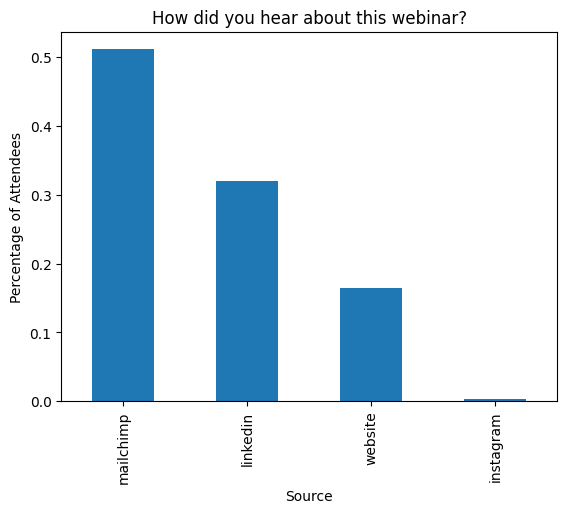

In [ ]:
_ = sources.plot(kind='bar', title = "How did you hear about this webinar?", xlabel= 'Source',ylabel = 'Percentage of Attendees')

#Time Spent

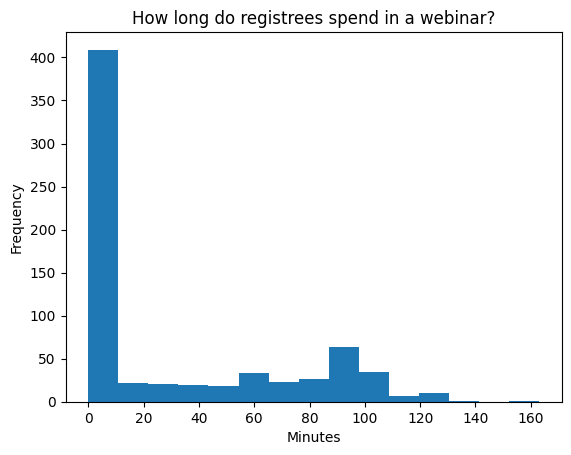

In [ ]:
# How long do registrees spend in a webinar?
_ = plt.hist(df['Total_time'], bins=15)
_ = plt.xlabel('Minutes')
_ = plt.ylabel('Frequency')
_ = plt.title('How long do registrees spend in a webinar?')

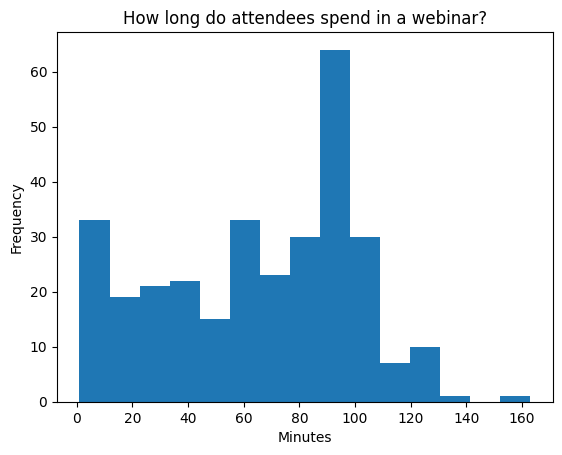

In [ ]:
# How long do attendees spend in a webinar?
_ = plt.hist(df_attended['Total_time'], bins=15)
_ = plt.xlabel('Minutes')
_ = plt.ylabel('Frequency')
_ = plt.title('How long do attendees spend in a webinar?')

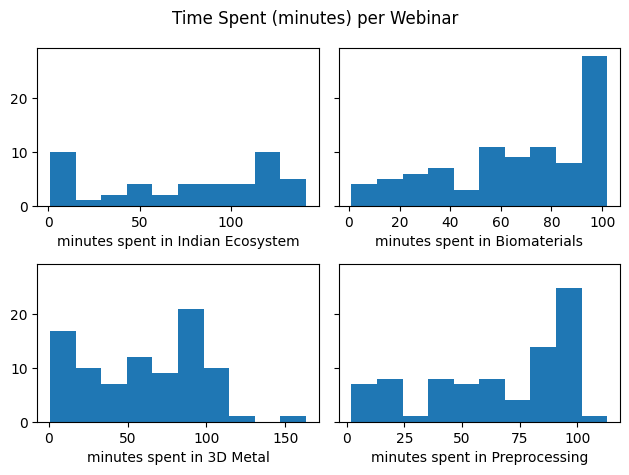

In [ ]:

fig, ax = plt.subplots(2, 2, sharey=True) #creates n rows and m columns of small plots
    #sharey=True forces the y-axis to the be the same on all plots
fig.suptitle("Time Spent (minutes) per Webinar")    
ax[0, 0].hist(df_attended[df_attended['webinar_name']=='Indian Ecosystem']['Time in Session (minutes)'])
ax[0, 0].set_xlabel('minutes spent in Indian Ecosystem')
ax[1, 0].hist(df_attended[df_attended['webinar_name']=='3D Metal']['Time in Session (minutes)'])
ax[1, 0].set_xlabel('minutes spent in 3D Metal')
ax[0, 1].hist(df_attended[df_attended['webinar_name']=='Biomaterials']['Time in Session (minutes)'])
ax[0, 1].set_xlabel('minutes spent in Biomaterials')
ax[1, 1].hist(df_attended[df_attended['webinar_name']=='Preprocessing']['Time in Session (minutes)'])
ax[1, 1].set_xlabel('minutes spent in Preprocessing')

fig.tight_layout()


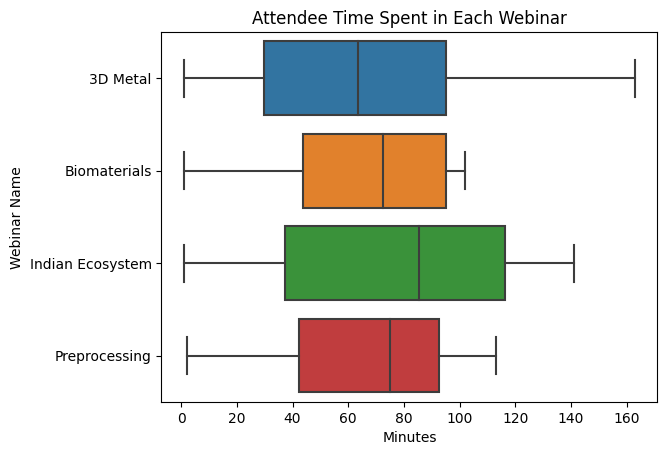

In [ ]:
_ = sns.boxplot(data = df_attended, x = 'Time in Session (minutes)',  y = 'webinar_name')
_ = plt.title('Attendee Time Spent in Each Webinar')
_ = plt.xlabel('Minutes')
_ = plt.ylabel('Webinar Name')
sns.set_palette('muted') 

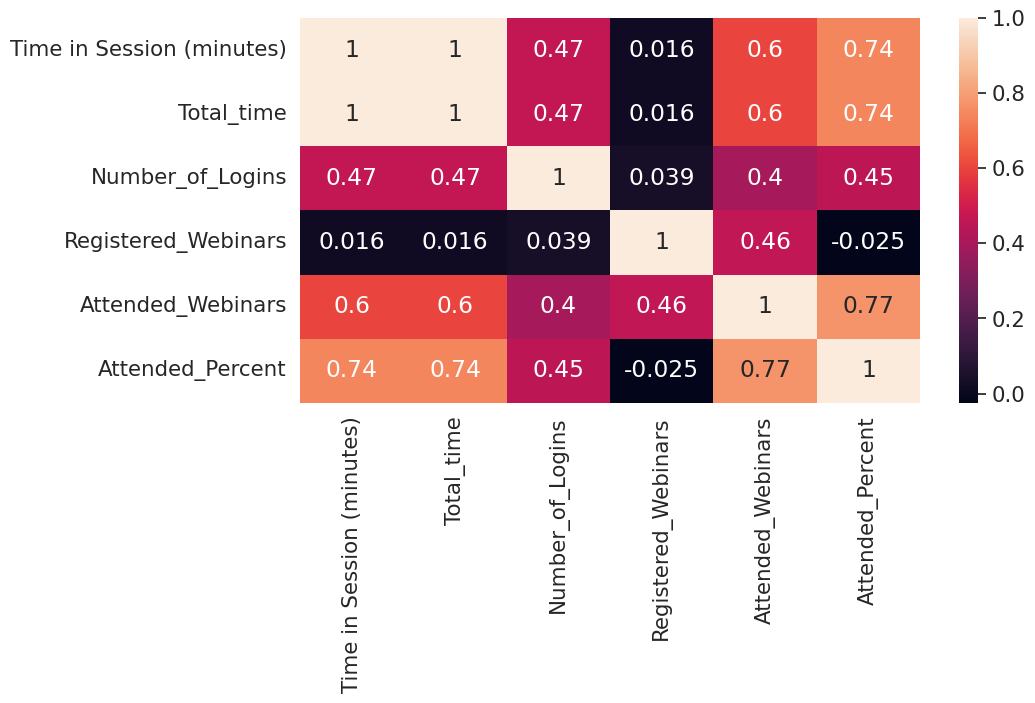

In [ ]:
# heatmap of correlation
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot=True) 
plt.show()

In [ ]:
# Average time spent in a webinar per job title
groups3 = df_attended.groupby('Job Title Category')['Time in Session (minutes)'].mean().sort_values(ascending=False)
groups3

Job Title Category
Designer                 78.428571
Marketer, Salesperson    77.363636
Researcher               71.333333
None                     69.121212
C-Suite                  68.176471
Consultant               64.250000
Business Developer       60.500000
Engineer                 60.307692
Academic                 60.279070
Manager, Director        58.473684
Other                    55.913043
Clinician                50.125000
Operator                  2.000000
Name: Time in Session (minutes), dtype: float64

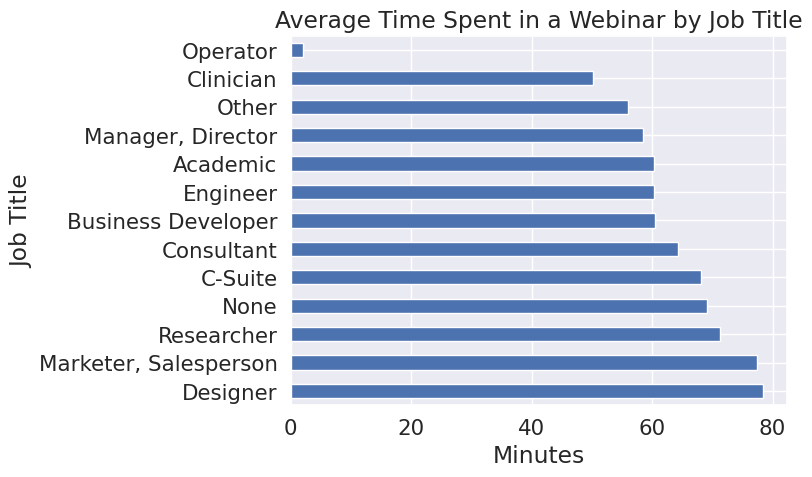

In [ ]:
_ = groups3.plot(kind='barh')
_ = plt.title("Average Time Spent in a Webinar by Job Title")
_ = plt.xlabel("Minutes")
_ = plt.ylabel('Job Title')

In [ ]:
# Average time spent in a webinar per country
groups4 = df_attended.groupby('Country/Region Name')['Time in Session (minutes)'].mean().sort_values(ascending=False)
groups4

Country/Region Name
Indonesia                 102.000000
Colombia                  102.000000
Guatemala                 100.000000
Costa Rica                100.000000
Bolivia                    98.000000
Nigeria                    91.000000
Finland                    89.000000
Bosnia and Herzegovina     85.000000
Germany                    83.882353
Vietnam                    80.000000
Brazil                     76.818182
Canada                     75.000000
Hungary                    74.833333
France                     72.333333
United Kingdom             70.909091
Sweden                     69.000000
Israel                     68.000000
India                      67.927273
Spain                      67.500000
Portugal                   66.000000
Poland                     65.500000
United States              65.192308
Kenya                      64.666667
Korea, Republic of         63.000000
Ukraine                    63.000000
Pakistan                   61.500000
Hong Kong SAR     

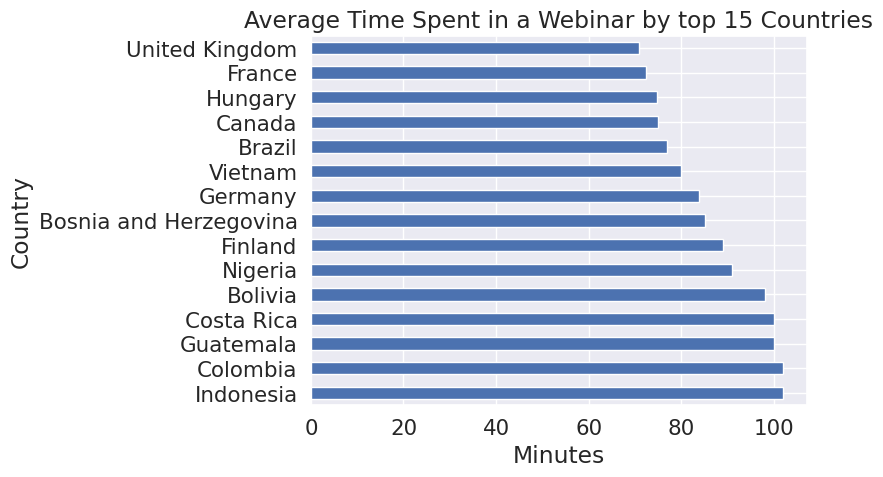

In [ ]:
groups4[:15].plot(kind='barh')
_ = plt.title("Average Time Spent in a Webinar by top 15 Countries")
_ = plt.xlabel("Minutes")
_ = plt.ylabel('Country')

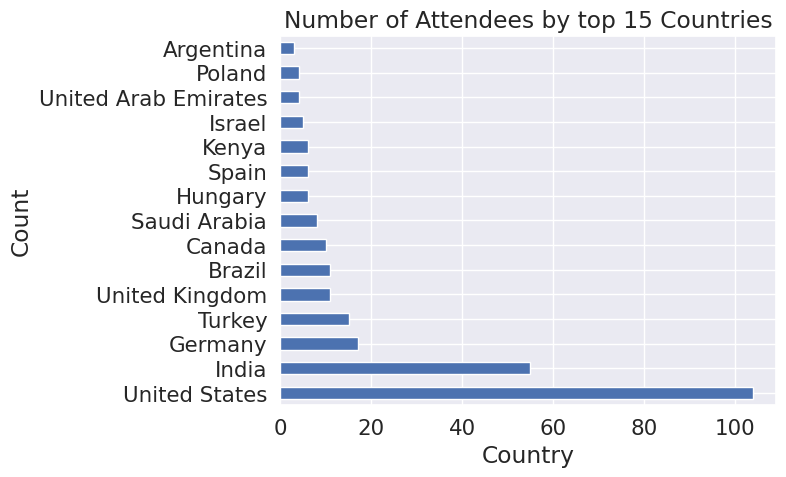

In [ ]:
#Number of attendees by country
df_attended['Country/Region Name'].value_counts()[:15].plot(kind='barh')
_ = plt.title("Number of Attendees by top 15 Countries")
_ = plt.ylabel("Count")
_ = plt.xlabel('Country')

In [ ]:
# Average time spent in a webinar per webinar
groups5 = df_attended.groupby('webinar_name')['Time in Session (minutes)'].mean().sort_values(ascending=False)
groups5

webinar_name
Indian Ecosystem    74.673913
Biomaterials        66.826087
Preprocessing       64.421687
3D Metal            59.431818
Name: Time in Session (minutes), dtype: float64

In [ ]:
# Average time spent in a webinar per industry
groups6 = df_attended.groupby('Industry')['Time in Session (minutes)'].mean().sort_values(ascending=False)
groups6

Industry
Software - Other                     97.000000
Advertising/Marketing/PR             92.000000
Telecommunications                   82.000000
Other                                69.720000
High Tech - Other                    69.500000
Manufacturing                        67.977273
Consulting                           67.636364
Education                            67.507937
Medical,  Pharma,  Biotech           66.605505
Energy,  Chemical,  Utilities        63.400000
Software - Healthcare                61.500000
Hospital,  Clinic,  Doctor Office    57.833333
High Tech - ISP                      55.000000
High Tech - Hardware                 50.444444
Accounting                           44.000000
Legal                                38.000000
Financial Services - Other           34.000000
Aerospace & Defense                  22.000000
Government - Federal                 15.666667
Call Center Outsourcing                    NaN
Consumer Products                          NaN
Gove

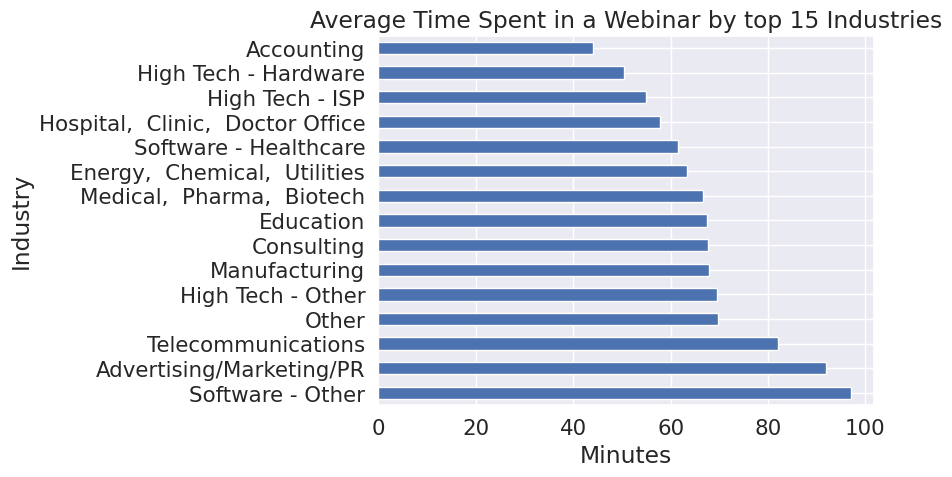

In [ ]:
groups6[:15].plot(kind='barh')
_ = plt.title("Average Time Spent in a Webinar by top 15 Industries")
_ = plt.xlabel("Minutes")
_ = plt.ylabel('Industry')

In [ ]:
df.columns

Index(['Email', 'Attended', 'City', 'Country/Region', 'State/Province',
       'Industry', 'Organization', 'Job Title', 'Questions & Comments',
       'Registration Time', 'Join Time', 'Leave Time',
       'Time in Session (minutes)', 'Country/Region Name', 'Source Name',
       'webinar_name', 'Job Title Category', 'Total_time', 'Number_of_Logins',
       'Registered_Webinars', 'Attended_Webinars', 'Attended_Percent'],
      dtype='object')